In [1]:
import os
import numpy as np
import pandas as pd

import torchaudio

import matplotlib.pyplot as plt


C:\Users\arunps\AppData\Roaming\Python\Python310\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [15]:
vocaud = r'C:\Users\arunps\OneDrive\Projects\Scripts\Python\VisionInfantNet\InfantVocAudio'

In [2]:
meta_df = pd.read_csv(r'C:\Users\arunps\OneDrive\Projects\Scripts\Python\VisionInfantNet\metadata.csv')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train_files, test_files = train_test_split(meta_df, test_size=0.2, random_state=42)

In [6]:
test_files

,Unnamed: 0,file_path,label
428,1126,WW25_segment3_11_Canonical.wav,Canonical
440,1161,WW25_segment3_152_Canonical.wav,Canonical
9,14,WW04_segment1_22_Canonical.wav,Canonical
468,1241,WW25_segment3_81_NonCanonical.wav,NonCanonical
39,50,WW04_segment1_55_Canonical.wav,Canonical
...,...,...,...
193,350,WW15_segment2_73_NonCanonical.wav,NonCanonical
175,329,WW15_segment2_54_NonCanonical.wav,NonCanonical
304,518,WW18_segment1_70_NonCanonical.wav,NonCanonical
204,362,WW15_segment2_84_NonCanonical.wav,NonCanonical


In [17]:
durations = []
for filename in meta_df['file_path']:
    waveform, sample_rate = torchaudio.load(os.path.join(vocaud, filename))
    #print(f'size: {waveform.size(1)}')
    #print(f'sample_rate: {sample_rate}')
    duration = waveform.size(1) / sample_rate
    durations.append(duration)

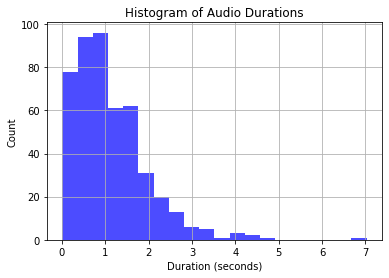

In [18]:
plt.hist(durations, bins=20, color='blue', alpha=0.7)
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.title('Histogram of Audio Durations')
plt.grid(True)
plt.show()

In [36]:
# duration of canonical babbling
durations = []
for filename in meta_df[meta_df['label'] == 'Canonical']['file_path']:
    waveform, sample_rate = torchaudio.load(os.path.join(vocaud, filename))
    #print(f'size: {waveform.size(1)}')
    #print(f'sample_rate: {sample_rate}')
    duration = waveform.size(1) / sample_rate
    durations.append(duration)


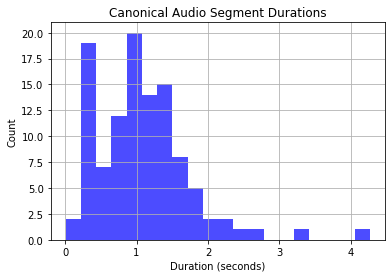

In [37]:
plt.hist(durations, bins=20, color='blue', alpha=0.7)
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.title('Canonical Audio Segment Durations')
plt.grid(True)
plt.show()

In [34]:
# duration of NonCanonical babbling
durations = []
for filename in meta_df[meta_df['label'] == 'NonCanonical']['file_path']:
    waveform, sample_rate = torchaudio.load(os.path.join(vocaud, filename))
    #print(f'size: {waveform.size(1)}')
    #print(f'sample_rate: {sample_rate}')
    duration = waveform.size(1) / sample_rate
    durations.append(duration)

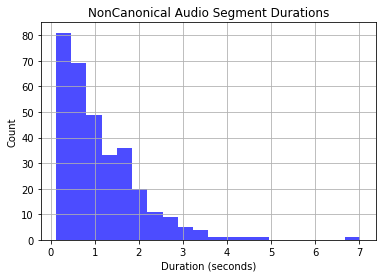

In [35]:
plt.hist(durations, bins=20, color='blue', alpha=0.7)
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.title('NonCanonical Audio Segment Durations')
plt.grid(True)
plt.show()

In [30]:
# duration of Other sounds
durations = []
for filename in meta_df[meta_df['label'] == 'Other']['file_path']:
    waveform, sample_rate = torchaudio.load(os.path.join(vocaud, filename))
    #print(f'size: {waveform.size(1)}')
    #print(f'sample_rate: {sample_rate}')
    duration = waveform.size(1) / sample_rate
    durations.append(duration)

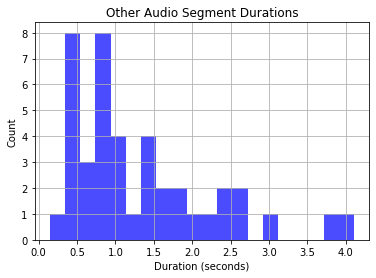

In [33]:
plt.hist(durations, bins=20, color='blue', alpha=0.7)
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.title('Other Audio Segment Durations')
plt.grid(True)
plt.show()

In [1]:
# create traina and test files
import os
from sklearn.model_selection import train_test_split
import shutil


def split_dataset(input_folder, train_folder, test_folder, test_size=0.2, random_state=None):
    # Create train and test folders if they don't exist
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(test_folder, exist_ok=True)

    # List all files in the input folder
    files = os.listdir(input_folder)

    # Split files into train and test sets
    train_files, test_files = train_test_split(files, test_size=test_size, random_state=random_state)

    # Move train files to train folder
    for file in train_files:
        src = os.path.join(input_folder, file)
        dst = os.path.join(train_folder, file)
        shutil.move(src, dst)

    # Move test files to test folder
    for file in test_files:
        src = os.path.join(input_folder, file)
        dst = os.path.join(test_folder, file)
        shutil.move(src, dst)

In [2]:
# Specify input folder containing audio files
input_folder = r'C:\Users\arunps\OneDrive\Projects\Scripts\Python\VisionInfantNet\InfantVocAudio'
# Specify train and test folders
train_folder = 'train'
test_folder = 'test'

# Split the dataset
split_dataset(input_folder, train_folder, test_folder, test_size=0.2, random_state=42)